In [1]:
import geopandas as gpd
print(gpd.__version__) 

1.0.1


In [30]:
url = "https://naciscdn.org/naturalearth/110m/cultural/ne_110m_admin_0_countries.zip"
world_gdf = gpd.read_file(url)
world_gdf.head() # 데이터 확인 상위 5개

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,TLC,ADMIN,...,FCLASS_TR,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,geometry
0,Admin-0 country,1,6,Fiji,FJI,0,2,Sovereign country,1,Fiji,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((180 -16.06713, 180 -16.55522, ..."
1,Admin-0 country,1,3,United Republic of Tanzania,TZA,0,2,Sovereign country,1,United Republic of Tanzania,...,None,None,None,None,None,None,None,None,None,"POLYGON ((33.90371 -0.95, 34.07262 -1.05982, 3..."
2,Admin-0 country,1,7,Western Sahara,SAH,0,2,Indeterminate,1,Western Sahara,...,Unrecognized,Unrecognized,Unrecognized,None,None,Unrecognized,None,None,None,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,Admin-0 country,1,2,Canada,CAN,0,2,Sovereign country,1,Canada,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-122.84 49, -122.97421 49.0025..."
4,Admin-0 country,1,2,United States of America,US1,1,2,Country,1,United States of America,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-122.84 49, -120 49, -117.0312..."


#### 로컬에서 파일 불러오기

In [10]:
states = gpd.read_file('E:/Github/Streamlit_WS/Streamlit_Basic/Basic/02_geo_map/data/map/ne_110m_admin_1_states_provinces.shp')
states[['adm1_code', 'iso_3166_2', 'name', 'geometry']].head(6)

,adm1_code,iso_3166_2,name,geometry
0,USA-3514,US-MN,Minnesota,"POLYGON ((-89.95766 47.28691, -90.13175 47.292..."
1,USA-3515,US-MT,Montana,"POLYGON ((-116.04823 49.00037, -113.0595 49.00..."
2,USA-3516,US-ND,North Dakota,"POLYGON ((-97.22894 49.00089, -97.21414 48.902..."
3,USA-3517,US-HI,Hawaii,"MULTIPOLYGON (((-155.93665 19.05939, -155.9080..."
4,USA-3518,US-ID,Idaho,"POLYGON ((-116.04823 49.00037, -115.9678 47.95..."
5,USA-3519,US-WA,Washington,"POLYGON ((-117.03143 48.99931, -117.02665 47.7..."


In [11]:
print(type(states)) # 타입 확인 

<class 'geopandas.geodataframe.GeoDataFrame'>


In [12]:
states.shape # 데이터의 행과 열의 개수를 확인

(51, 122)

In [13]:
states.columns  # 컬럼 확인

Index(['featurecla', 'scalerank', 'adm1_code', 'diss_me', 'iso_3166_2',
       'wikipedia', 'iso_a2', 'adm0_sr', 'name', 'name_alt',
       ...
       'FCLASS_ID', 'FCLASS_PL', 'FCLASS_GR', 'FCLASS_IT', 'FCLASS_NL',
       'FCLASS_SE', 'FCLASS_BD', 'FCLASS_UA', 'FCLASS_TLC', 'geometry'],
      dtype='object', length=122)

In [14]:
states.geom_type.head() # 지오메트리 타입 확인

0         Polygon
1         Polygon
2         Polygon
3    MultiPolygon
4         Polygon
dtype: object

In [15]:
states.crs # 좌표계 확인

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

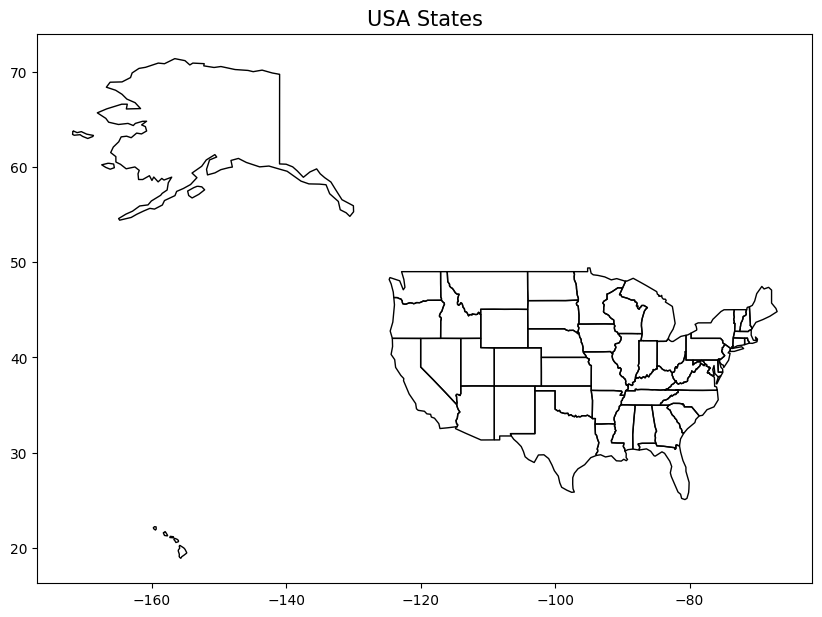

In [17]:
import matplotlib.pyplot as plt

ax = states.plot(figsize=(10, 10), edgecolor='black', facecolor='none')
ax.set_title('USA States', fontsize=15)
plt.savefig('./output/map01.png', dpi=300)
plt.show()

#### 파일 내보내기 

In [18]:
states.to_file('data/my_file.json', driver='GeoJSON')   # GeoJSON 파일로 저장

#### 파일 불러오기

In [19]:
df = gpd.read_file('data/my_file.json')
df[['adm1_code', 'iso_3166_2', 'name', 'geometry']].head(6)

,adm1_code,iso_3166_2,name,geometry
0,USA-3514,US-MN,Minnesota,"POLYGON ((-89.95766 47.28691, -90.13175 47.292..."
1,USA-3515,US-MT,Montana,"POLYGON ((-116.04823 49.00037, -113.0595 49.00..."
2,USA-3516,US-ND,North Dakota,"POLYGON ((-97.22894 49.00089, -97.21414 48.902..."
3,USA-3517,US-HI,Hawaii,"MULTIPOLYGON (((-155.93665 19.05939, -155.9080..."
4,USA-3518,US-ID,Idaho,"POLYGON ((-116.04823 49.00037, -115.9678 47.95..."
5,USA-3519,US-WA,Washington,"POLYGON ((-117.03143 48.99931, -117.02665 47.7..."


### 지리 데이터 매핑

In [33]:
import pandas as pd
import numpy as np

# 가상의 데이터 생성
data = pd.DataFrame({
    'name': df['name'],
    'data': np.random.randint(100, 1000, len(df))
})

data.head()

,name,data
0,Minnesota,793
1,Montana,405
2,North Dakota,680
3,Hawaii,426
4,Idaho,338


In [34]:
# 데이터 매핑
world_df = df.merge(data, on = 'name')
world_df[['adm1_code', 'iso_3166_2', 'name', 'geometry', 'data']].head()

,adm1_code,iso_3166_2,name,geometry,data
0,USA-3514,US-MN,Minnesota,"POLYGON ((-89.95766 47.28691, -90.13175 47.292...",793
1,USA-3515,US-MT,Montana,"POLYGON ((-116.04823 49.00037, -113.0595 49.00...",405
2,USA-3516,US-ND,North Dakota,"POLYGON ((-97.22894 49.00089, -97.21414 48.902...",680
3,USA-3517,US-HI,Hawaii,"MULTIPOLYGON (((-155.93665 19.05939, -155.9080...",426
4,USA-3518,US-ID,Idaho,"POLYGON ((-116.04823 49.00037, -115.9678 47.95...",338


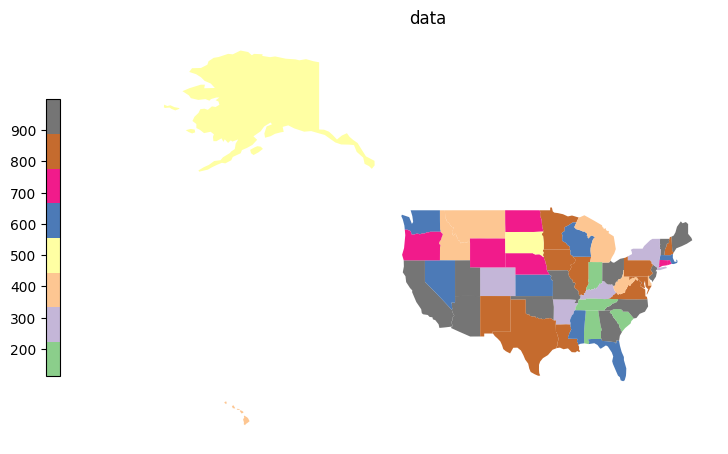

In [35]:
import matplotlib.pyplot as plt 

fig, ax = plt.subplots(figsize=(10, 6)) # 그래프 크기 설정
world_df.plot(ax=ax, column="data", cmap="Accent", legend=False, alpha=0.9) # 데이터 매핑
ax.set_title('data') 
ax.set_axis_off()

cb = fig.colorbar(ax.collections[0], ax=ax, location = 'left', shrink = 0.6) # 컬러바 설정 
plt.savefig('output/map02.png', dpi=200) # 그래프 저장
plt.show()

### 한반도 시각화 하기

In [38]:
world = gpd.read_file('E:\Github\Streamlit_WS\Streamlit_Basic\Basic/02_geo_map\data\map/ne_110m_admin_0_countries.shx')
world.head()

<>:1: SyntaxWarning: invalid escape sequence '\G'
<>:1: SyntaxWarning: invalid escape sequence '\G'
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_19500\1997908999.py:1: SyntaxWarning: invalid escape sequence '\G'
  world = gpd.read_file('E:\Github\Streamlit_WS\Streamlit_Basic\Basic/02_geo_map\data\map/ne_110m_admin_0_countries.shx')


,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,TLC,ADMIN,...,FCLASS_TR,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,geometry
0,Admin-0 country,1,6,Fiji,FJI,0,2,Sovereign country,1,Fiji,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((180 -16.06713, 180 -16.55522, ..."
1,Admin-0 country,1,3,United Republic of Tanzania,TZA,0,2,Sovereign country,1,United Republic of Tanzania,...,None,None,None,None,None,None,None,None,None,"POLYGON ((33.90371 -0.95, 34.07262 -1.05982, 3..."
2,Admin-0 country,1,7,Western Sahara,SAH,0,2,Indeterminate,1,Western Sahara,...,Unrecognized,Unrecognized,Unrecognized,None,None,Unrecognized,None,None,None,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,Admin-0 country,1,2,Canada,CAN,0,2,Sovereign country,1,Canada,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-122.84 49, -122.97421 49.0025..."
4,Admin-0 country,1,2,United States of America,US1,1,2,Country,1,United States of America,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-122.84 49, -120 49, -117.0312..."


In [48]:
world.geom_type[:5]

0    MultiPolygon
1         Polygon
2         Polygon
3    MultiPolygon
4    MultiPolygon
dtype: object

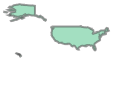

In [46]:
world.geometry[4] # 4번째 데이터의 지오메트리 정보

In [42]:
type(world.geometry[1]) # 지오메트리 타입 확인

shapely.geometry.polygon.Polygon

In [43]:
print(world.geometry[1]) # 지오메트리 정보 확인

POLYGON ((33.90371119710453 -0.9500000000000001, 34.07261999999997 -1.0598199999999451, 37.69868999999994 -3.0969899999999484, 37.7669 -3.6771200000000004, 39.20222 -4.67677, 38.74053999999995 -5.9089499999999475, 38.79977000000008 -6.475660000000005, 39.44 -6.839999999999861, 39.47000000000014 -7.099999999999966, 39.19468999999998 -7.703899999999976, 39.25203000000005 -8.00780999999995, 39.18652000000009 -8.48550999999992, 39.53574000000009 -9.112369999999885, 39.94960000000003 -10.098400000000026, 40.316586229110854 -10.317097752817492, 40.31659000000002 -10.317099999999868, 39.52099999999996 -10.89688000000001, 38.42755659358775 -11.285202325081656, 37.827639999999974 -11.26878999999991, 37.471289999999954 -11.568759999999997, 36.775150994622805 -11.594537448780805, 36.51408165868426 -11.720938002166735, 35.31239790216904 -11.439146416879147, 34.55998904799935 -11.520020033415925, 34.27999999999997 -10.160000000000025, 33.940837724096525 -9.693673841980285, 33.73972000000009 -9.4171

In [50]:
world.columns # 컬럼 확인

Index(['featurecla', 'scalerank', 'LABELRANK', 'SOVEREIGNT', 'SOV_A3',
       'ADM0_DIF', 'LEVEL', 'TYPE', 'TLC', 'ADMIN',
       ...
       'FCLASS_TR', 'FCLASS_ID', 'FCLASS_PL', 'FCLASS_GR', 'FCLASS_IT',
       'FCLASS_NL', 'FCLASS_SE', 'FCLASS_BD', 'FCLASS_UA', 'geometry'],
      dtype='object', length=169)

In [51]:
kor_geom = world[world['SOVEREIGNT'].isin(['South Korea', 'North Korea'])].geometry
kor_geom.boundary.squeeze()

95    MULTILINESTRING ((130.78 42.22001, 130.78 42.2...
96    LINESTRING (126.17476 37.74969, 126.23734 37.8...
dtype: geometry

In [52]:
print(kor_geom)

95    MULTIPOLYGON (((130.78 42.22001, 130.78 42.220...
96    POLYGON ((126.17476 37.74969, 126.23734 37.840...
Name: geometry, dtype: geometry


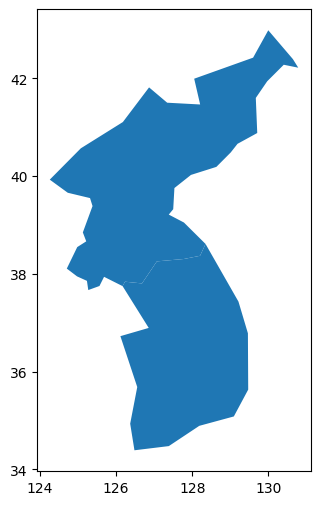

In [53]:
fig, ax = plt.subplots(figsize=(10, 6))
kor_geom.plot(ax=ax)
plt.savefig('output/map03.png', dpi=200)
plt.show()